### Regularization
    - Multicollinearity
        - Feature'lar(independent varibles) arasında çok yüksek (0.90 üstü) correlation olması durumudur.
        - Bu durum estimator'larımızın unstable olmasına neden olur.
        - Arzu edilen feature'lar arasında düşük korelasyon olmasıdır.
       
    - Ridge Regression Theory
        - Overfitting durumundan kurtulmak için penalty ekleme durumudur.
        - Bu eklenen penalty ile doğrunun eğimi azalır ve train datasındaki model puanı düşerken test datasında puan artar.
        - Bu penalty ayarlamasını lambda'yı (alpha) değiştirerek yapacağız.
        - Burada penalty'i keyfi değiştirmiyoruz bu değişiklik için slope(eğim)'i kullanıyoruz.
        - Burada lambda * slope**2 formülü kullanılıyor.
        - Feature seçimi için uygun değil. Hiçbir feature'ı silmez. Bu yüzden feature selection'ı zorlaştırır.
        - Multicollinearity durumu içi iyi çözüm üretir.
        - Az bir data olması durumunda bile iyi çalışır.
        - Bias biraz artar ama variance azalır.
        
    
    - Lasso Regression Theory
        - Overfitting durumundan kurtulmak için penalty ekleme durumudur.
        - Genel olarak Ridge' benzer. Farkı lambda * |slope| formülünü kullanmasıdır.
        - Feature seçimi için uygundur.
        - Daha düşük varyans ve daha düşük hata.
        - Dezavantajlarından biri feature'ların çok yüksek korelasyonu varsa onlardan sadece birini seçer.
        - Feature selection yapmak istiyorsanız Lasso'yu kullanacaksınız.
    
    - Elastic-Net
        - Ridge ve Lasso'nun kombinasyonudur.
        - "fi" diye bir katsayısı vardır. Bu katsayıdaki değişiklikle Ridge ve Lasso oranlarını belirlersiniz.
        - fi katsayısı 0-1 aralığında değişir.
        - fi = 1 olursa sadece Ridge kullanır. fi = 0 olursa sadece Lasso kullanır.
        - Grid search kullanarak bu fi değerini belirleyeceğiz.
          
    - Feature Scaling
        - Feature'ların değer aralıkları çok farklı olabilir. Mesela aracın vites sayısı 2-10 arasında olabilirken aracın motor hacmi 1000-3000 aralığında olabilir. Bu feature'ların scaling yapılarak hepsinin birbirine yakın değerler haline getirilmesi gerekir.
        - Scaling yapma konusunda kararsız kalırsanız scaling yapmanız önerilir. Bir zararı olmaz.
        - Scaling sonrası feature'ları kıyaslamak kolay olacaktır.
        - Test datasını da scale etmelisiniz. Ancak sadece Train datası fit edilecek.
        - Ancak label(target) için scaling yapılmaz. Yapılması durumunda Data Leakage olabilir. ÖNEMLİ !
        - İki çeşit scaling vardır. Standardization ve Normalization.
            - Standardization:
                - Deviaton = 1, mean = 0 olacak şekilde veriyi dönüştürür.
            - Normalization:
                - Tüm datayı 0-1 aralığına çeker.
         
    - Cross-Validation
        - Diyelim ki datayı %80 train %20 test olarak ayırdık. Burada test için ayrılan datamıza dokunmuyoruz(Hold out). Geri kalan data içinde Bu test ettğimiz data toplam datayı temsil ediyor mu bilmiyoruz. Ordan alacağımız puan gerçeği yansıtmayabilir. Random seçildiği için başka bir tercihte başka puan çıkabilir. Bu durumu önlemek için train datasında kombinasyonlu olarak train-validation çiftleri oluşturuluyor ve puanların ortalamasını alarak nihai puanı çıkartıyor.
        - K-fold değeri ile kaç defa validation yapacağımızı belirleriz. Genelde 5 veya 10 tercih edilir.
        - K-fold = 5 olması durumunda %20 lik test durumunu 5 kez dener.
        - Cross validation yaparken diğer bir yaklaşım da LOO(Leave one out)'dur. Bu durumda 1 değer hariç tüm değerlerle train yapar ve bu tek değerde test yapar.Sonra diğer 1 taneyi test için ayırır. Bu durum özellikle büyük datalarda çok uzun sürdüğü için bu yöntem çok tercih edilmiyor.
        
    - Grid Search
        - Hyperparameter: Modelin performasını etkileyen ve bizim ayarladığımız parametrelere hyperparameter denir.
        - Bu hyperparameter'leri optimize etmek için GridSearch kullanırız.
        - GridSearch, en uygun parametre değerini bulmak için uygulanır.
        - Sırayla her bir parametreyi dener ve bize en uygun sonucu verir. Ayrıca Cross-Validation da yapar.
    

### Notes
    - Gradient Descent : Türev bilgisi kullanarak katsayıları optimize etmek.
    - Underfitting: 
        - Model veriden tam anlamıyla öğrenememiştir. 
        - High Bias, Low variance durumu vardır.
        - Underfitting sebeplerinden biri datanın ya da feature'ların az sayıda olması ya da model complexity'sinin yetersiz olmasıdır. Çözmek için feature sayısı artırılabilir ya da model complexity artırılabilir.
    - Overfitting:
        - Model veriyi genellemek yerine ezberlemiştir.
        - Complexity'i azaltarak veya regularization(Ridge, Lasso) yaparak düzeltilebilir.
        

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 100)

### Polynomial Regression

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

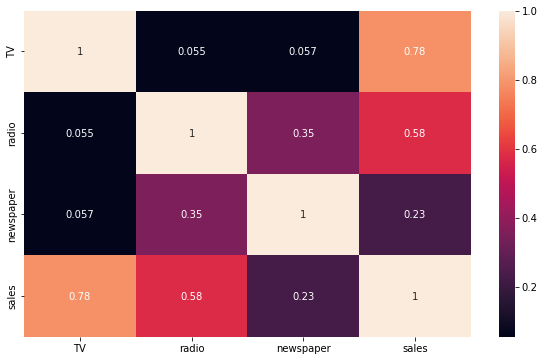

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
X = df.drop(columns="sales")
y = df["sales"]

In [9]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Polynomial Conversion

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# We will create an artificial overfitting situation by taking poly feature from 5 degrees.
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [12]:
poly_features.shape

(200, 55)

### Train - Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
# Burada polynomial regression kullanacağımız için X yerine poly_features yazdık

### Scaling The Data
    - Scaling : Fitting our data to same ranges.
        - If we don't a scale, features in large range are weighted more and our model will return incorrect results. We use scale to prevent this.
        - Scaling also accelerates the work of Gradient Descent-based models such as linear, logistic regression.
        - If you are confused about whether to apply scaling or not , you can apply scale directly.
        - Target is never scaled.
        
    - Data Leakage : Leakage of information about the data in the test set to the data in the train set.
        - To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. No fit operation is applied to all data.
 
    

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Robust scaler is used when outlier could be present

scaler = StandardScaler()

In [16]:
scaler.fit(X_train)
# Apply just for X_train not for X_test (Kalıp çıkarma)

StandardScaler()

In [17]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit.
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [18]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

### Checking Standardization(std = 1 and mean = 0)
 - This gives us the z-scores. So it's also called z-score scaling.
 - These values show where in the normal distribution they correspond to z-score.

In [21]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()
# Applying aggregation across all the columns, mean and std will be found for each column in the dataframe.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


### Polynomial Regression Model Building

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [24]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    scores = {name+"_train" : {
                                "R2" : r2_score(y_train, y_train_pred),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))
                               },
              name+"_test" : {
                                "R2" : r2_score(y_test, y_pred),
                                "mae" : mean_absolute_error(y_test, y_pred),
                                "mse" : mean_squared_error(y_test, y_pred),
                                "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))
                              }}
    return pd.DataFrame(scores)

In [28]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls
# There is an overfitting situation.

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


### Multicollinearity
    - If there is a strong correlation between the independent variables, this situation is called multicollinearity.
    - Multicollinearity prevents my model from detecting important features.

In [30]:
def color_red(val):
    if abs(val) > 0.90 and abs(val) < 0.99:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

In [33]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

### Cross Validation